In [1]:
import tensorflow as tf
import os

2023-12-10 19:01:43.182629: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
#PARENT DIRECTORY
PARENT_DIRECTORY = os.getcwd()
DATASET_PATH = os.path.join(PARENT_DIRECTORY, 'new-dataset')
print(f"Total folder videos: {len(DATASET_PATH)}")

Total folder videos: 57


In [21]:
#Create Labeling Data
class_labels = sorted(os.listdir(DATASET_PATH))
count_labels = len(class_labels)
print("Label : " + str(class_labels))
print("Total : " + str(count_labels))

Label : ['1', '10', '100', '3', '5', '7', 'abuabu', 'hijau', 'kuning', 'puluhan']
Total : 10
['1', '10', '100', '3', '5', '7', 'abuabu', 'hijau', 'kuning', 'puluhan']


In [45]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

batch_size = 32
# target_size = (128,128)
# target_size = (256,256)
# target_size = (512,512)
target_size = (400,256)
timesteps  = 200
train_datagen = ImageDataGenerator(
            rescale=1./255,
            zoom_range=0.1,
            horizontal_flip=False,
            validation_split=0.2)

train_gen = train_datagen.flow_from_directory(
            DATASET_PATH, 
            target_size=target_size,
            shuffle=True,
            batch_size= batch_size,
            color_mode='rgb',
            class_mode='categorical',
            subset='training',)

val_gen = train_datagen.flow_from_directory(
            DATASET_PATH, target_size=target_size,
            batch_size= batch_size,
            color_mode='rgb',
            class_mode='categorical',
            subset='validation',)

(array(['/', 'U', 's', 'e', 'r', 's', '/', 'c', 'i', 'k', 'a', 'y', '/',
       'P', 'y', 't', 'h', 'o', 'n', '/', 'M', 'a', 'c', 'h', 'i', 'n',
       'e', '-', 'L', 'e', 'a', 'r'], dtype='<U1'), array(['U', 's', 'e', 'r', 's', '/', 'c', 'i', 'k', 'a', 'y', '/', 'P',
       'y', 't', 'h', 'o', 'n', '/', 'M', 'a', 'c', 'h', 'i', 'n', 'e',
       '-', 'L', 'e', 'a', 'r', 'n'], dtype='<U1'))
['U' 's' 'e' 'r' 's' '/' 'c' 'i' 'k' 'a' 'y' '/' 'P' 'y' 't' 'h' 'o' 'n'
 '/' 'M' 'a' 'c' 'h' 'i' 'n' 'e' '-' 'L' 'e' 'a' 'r' 'n']


In [6]:
epoch = 50
train_size = len(train_gen)
steps_per_epoch = 64
validation_steps = 7

(400, 256, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]


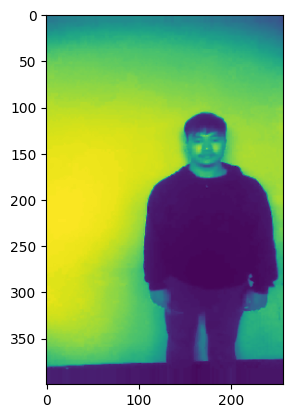

(400, 256, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


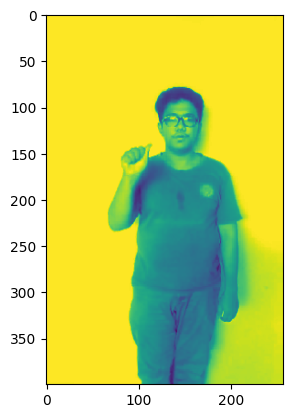

(400, 256, 3)
[0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]


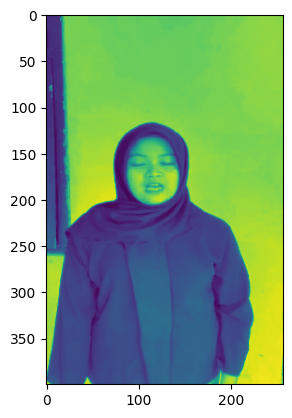

(400, 256, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


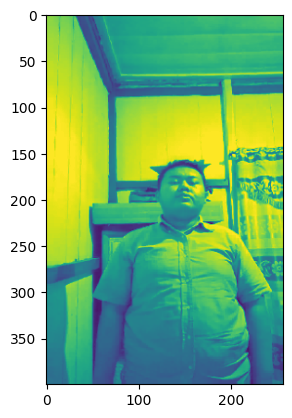

(400, 256, 3)
[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]


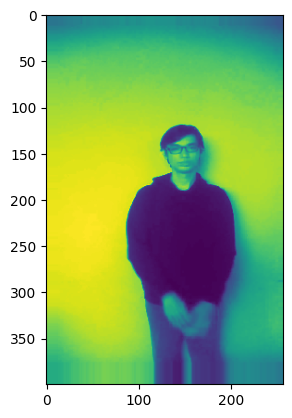

(400, 256, 3)
[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]


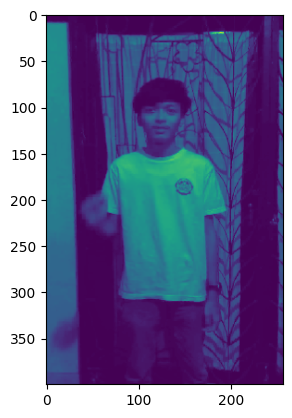

(400, 256, 3)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


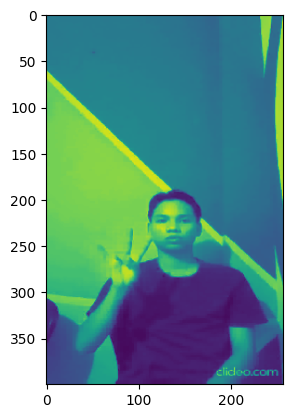

(400, 256, 3)
[0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]


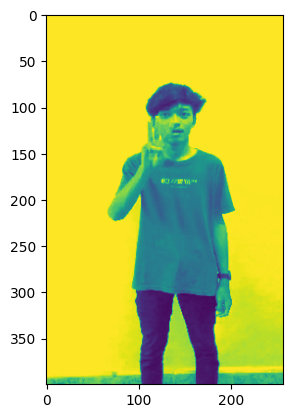

(400, 256, 3)
[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


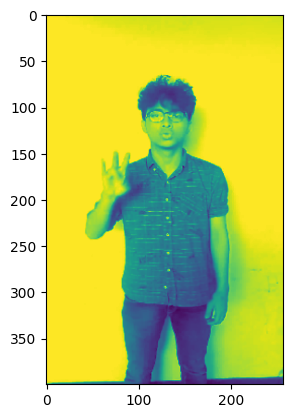

(400, 256, 3)
[0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]


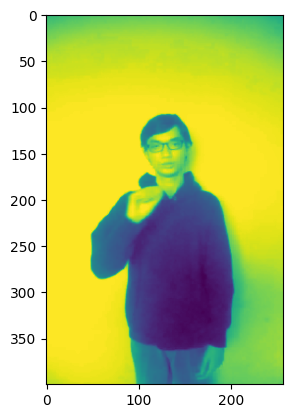

In [7]:
import matplotlib.pyplot as plt
x,y = train_gen.next()
#show 5 random images 
for i in range(0,5):
    image = x[i]
    label = y[i]
    print(x[i].shape)
    print (label)
    plt.imshow(image[:,:,0])
    plt.show()

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, Dense, Dropout, Flatten, MaxPooling2D

In [8]:
def cnn(num_label):
    model = Sequential()

    model.add(Conv2D(32, (3, 3), input_shape=(400, 256, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(3, 3)))
    model.add(Dropout(0.5))
    
    model.add(Conv2D(64, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(128, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Dropout(0.5))
    model.add(Conv2D(256, (3, 3), activation='relu'))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Flatten())

    # Dense atau Full Connection
    model.add(Dropout(0.5))
    model.add(Dense(512, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(units=num_label, activation='softmax'))

    return model


In [ ]:
from tensorflow.keras.callbacks import Callback
class MyCustomCallback(Callback):
    def __init__(self, target_accuracy):
        super(MyCustomCallback, self).__init__()
        self.target_accuracy = target_accuracy

    def on_epoch_end(self, epoch, logs=None):
        current_accuracy = logs.get('accuracy')
        if current_accuracy is not None and current_accuracy >= self.target_accuracy:
            print(f"\nTraining stopped as accuracy reached {self.target_accuracy}%.")
            self.model.stop_training = True

In [10]:
from keras.layers import Input
cnn_model = cnn(count_labels)

In [11]:
cnn_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
cnn_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 398, 254, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 132, 84, 32)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 132, 84, 32)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 130, 82, 64)       18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 65, 41, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 63, 39, 128)       7

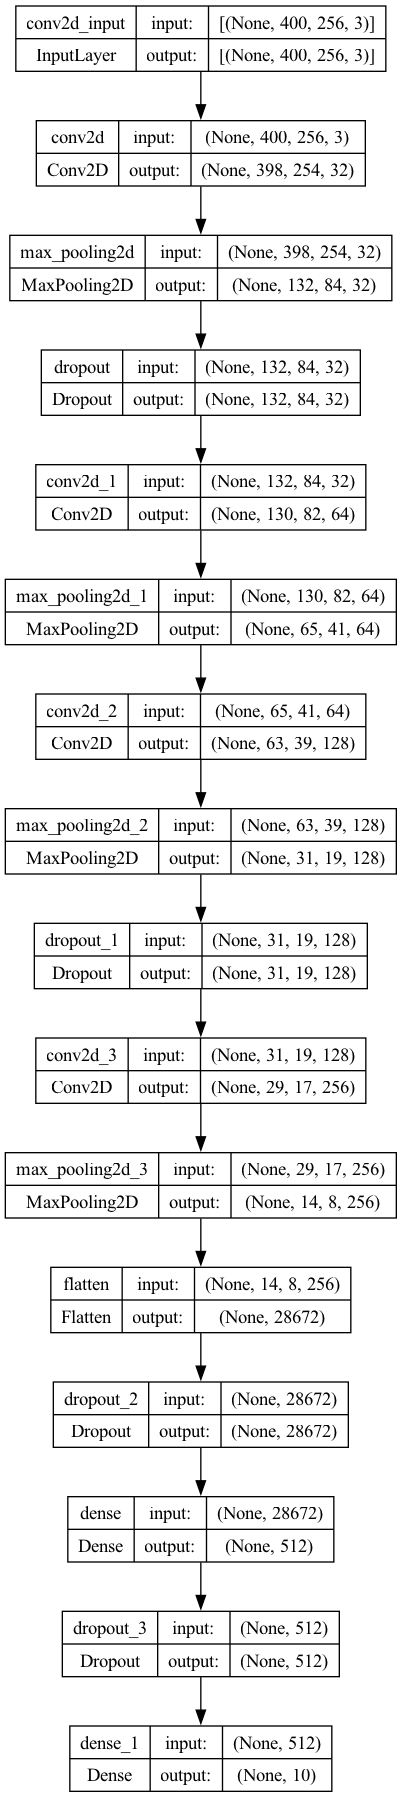

In [13]:
from tensorflow.keras.utils import plot_model
plot_model(cnn_model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
#SET TARGET ACCURACY
target_accuracy = 0.95  # Change this to your desired accuracy
custom_callback = MyCustomCallback(target_accuracy)

In [14]:
history = cnn_model.fit(
    train_gen,
    steps_per_epoch = steps_per_epoch,
    epochs = epoch,
    validation_data = val_gen,
    validation_steps = validation_steps,
    callbacks=[custom_callback]
)

Epoch 1/50
64/64 [==============================] - 289s 4s/step - loss: 2.4256 - accuracy: 0.1157 - val_loss: 2.2982 - val_accuracy: 0.1250
Epoch 2/50
64/64 [==============================] - 278s 4s/step - loss: 2.2705 - accuracy: 0.1299 - val_loss: 2.2943 - val_accuracy: 0.1875
Epoch 3/50
64/64 [==============================] - 288s 4s/step - loss: 2.2138 - accuracy: 0.1709 - val_loss: 2.2865 - val_accuracy: 0.1250
Epoch 4/50
64/64 [==============================] - 226s 3s/step - loss: 2.1291 - accuracy: 0.2104 - val_loss: 2.1760 - val_accuracy: 0.1652
Epoch 5/50
64/64 [==============================] - 229s 4s/step - loss: 2.0325 - accuracy: 0.2461 - val_loss: 2.3074 - val_accuracy: 0.2054
Epoch 6/50
64/64 [==============================] - 231s 4s/step - loss: 1.9140 - accuracy: 0.3057 - val_loss: 2.3222 - val_accuracy: 0.1250
Epoch 7/50
64/64 [==============================] - 223s 3s/step - loss: 1.6140 - accuracy: 0.4160 - val_loss: 2.3492 - val_accuracy: 0.2054
Epoch 8/50
64